### Create an Employee SQLite Database for Investment Firm and in that Database create EmployeeDetail table    with columns names employeeid(Primary Key), name, age, department, and salary. Now add the value in Employee_Detail table of given employee 


In [6]:
import sqlite3
db = sqlite3.connect("Employee.sqlite")
db

In [7]:
cur = db.cursor()
cur.execute('create table EmployeeDetail (employeeid int Primary Key, name Text, age int, deaprtment Text, salary int)')
db.commit()

OperationalError: table EmployeeDetail already exists

In [8]:
cur.execute('insert into EmployeeDetail values (100, "Rishav", 25, "Marketing", 50000)')

IntegrityError: UNIQUE constraint failed: EmployeeDetail.employeeid

In [9]:
cur.execute('insert into EmployeeDetail values (101, "Abhishek", 26, "Operations", 60000)')

IntegrityError: UNIQUE constraint failed: EmployeeDetail.employeeid

In [ ]:
cur.execute('insert into EmployeeDetail values (102, "Aman", 24, "Human Resource", 75000)')
db.commit()

In [10]:
cur.execute('DELETE from EmployeeDetail where employeeid = 101')
db.commit()

In [11]:
cur.execute('DELETE from EmployeeDetail where employeeid = 102')
db.commit()

# Update SQL table

In [12]:
import sqlite3
db = sqlite3.connect("Employee.sqlite")
cur = db.cursor()
cur.execute('create table EmployeeDetailsquestions (employeeid int Primary Key, name Text, age int, department Text, salary int)')
employee_id=[101,102,103,104,105,106,107,108,109,110,111,112]
name=['Aadarsh','Aarti','Siddharth','Aman','Amit','Shivansh','Vaibhav','Himanshu','Raman','Kunal','Adhira','Tanya']
age=[25,27,25,24,30,26,23,26,25,26,29,24]
department=['Marketing','Operations','Finance','Human Resource','Marketing','IT','Finance','IT','Operations','Marketing','Human Resource','Marketing']
salary=[50000,60000,85000,75000,50000,90000,85000,90000,60000,50000,75000,50000]
for i in range(len(employee_id)):
    cur.execute('insert into EmployeeDetailsquestions values(?, ?, ?, ?, ?)', (employee_id[i], name[i], age[i], department[i], salary[i]))
    db.commit()
print('Done')

OperationalError: table EmployeeDetailsquestions already exists

# Finance Employee SQLite

In [13]:
cur = db.cursor()
cur.execute("SELECT employeeid from EmployeeDetailsquestions where deaprtment == 'Finance' ")
ans = cur.fetchall()
for i in ans:
    print(i[0])

103
107


# Find Employees

In [14]:
cur = db.cursor()
cur.execute("SELECT deaprtment,count(*) from EmployeeDetailsquestions group by deaprtment")
ans = cur.fetchall()
for i in ans:
    print(i[0], i[1])

Finance 2
Human Resource 2
IT 2
Marketing 4
Operations 2


In [15]:
import sqlite3
import pandas as pd
db = sqlite3.connect('IMDB.sqlite')
df = pd.read_sql_query('SELECT * from genre', db)
df = df[df['genre'] != '']
df = df['genre'].value_counts()
for i in range(len(df)) :
    print(df.index[i], df.values[i])

Drama 77
Adventure 43
Action 33
Comedy 31
Biography 21
Sci-Fi 18
Thriller 14
Animation 13
Romance 13
Crime 11
Mystery 7
Fantasy 7
History 6
Family 3
Sport 3
Music 3
Western 2
War 2
Horror 2
Musical 1


# IMDB Movie

In [16]:
df = pd.read_sql_query('SELECT * from earning INNER JOIN imdb on IMDB.movie_id = earning.movie_id', db)
df.Total = df.Domestic + df.Worldwide
maxIndex = df[df.Total == df.Total.max()]
# print(df[maxIndex == df['Total']]['Rating'].values/)
print(maxIndex.Rating.values[0])

8.1


C:\Users\WELCOME\AppData\Local\Temp\ipykernel_22544\166728831.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Total = df.Domestic + df.Worldwide


# IMDB voted

In [17]:
df = pd.read_sql_query('SELECT * from IMDB', db)
max_voted_movie = df.TotalVotes.max()
name = df[df.TotalVotes == max_voted_movie]['Title']
rating = df[df.TotalVotes == max_voted_movie]['Rating']
print(name.values[0], rating.values[0])

Inception (2010) 8.8


# IMDB running time

In [18]:
df = pd.read_sql_query('SELECT * from IMDB', db)
df = df[df.Runtime != ""]
def convert(time):
    return int(time.replace("min", ""))
df.Runtime = df.Runtime.apply(convert)
max_length = df.Runtime.max()
name = df[df.Runtime == max_length]['Title']
print(name.values[0], max_length)


The Wolf of Wall Street (2013) 180


# IMDB Profit

In [19]:
import numpy as np
df = pd.read_sql_query("SELECT * from IMDB JOIN earning using(Movie_id)", db)
df.Budget.replace('', np.nan, inplace=True)
df.Budget.astype(float)
df.Profit = df.Domestic + df.Worldwide - df.Budget
profit_max = df.Profit.max()
name = df[df.Profit == profit_max]['Title']
print(name.values[0])
# def convert(amount):
    # return int(amount.replace(" ", 0))
# df.Budget = df.Budget.apply(convert)



Star Wars: The Force Awakens (2015)


C:\Users\WELCOME\AppData\Local\Temp\ipykernel_22544\3418025372.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Profit = df.Domestic + df.Worldwide - df.Budget


# IMDB least budget

In [20]:
df = pd.read_sql_query('SELECT * from IMDB inner join earning ON earning.Movie_id = IMDB.Movie_id', db)
# df.Budget.replace('', np.nan, inplace = True)
df= df[df.Budget != ""]
df.Budget.astype(float)
df = df[df.Budget==df.Budget.min()]
df.netProfit = df.Domestic + df.Worldwide
movie = df.netProfit.max()
ans = df[df.netProfit == movie]['Title']
print(ans.values[0])


Short Term 12 (2013)


C:\Users\WELCOME\AppData\Local\Temp\ipykernel_22544\3866128730.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.netProfit = df.Domestic + df.Worldwide


In [21]:
df = pd.read_sql_query('SELECT * from earning INNER JOIN IMDB ON earning.Movie_id = IMDB.Movie_id', db)
df.Domestic.replace('', 0, inplace=True)
df.Worldwide.replace('', 0, inplace=True)
df['netProfit'] = df.Domestic + df.Worldwide
def findYear(title) :
    return int(title.strip().split("(")[-1][:-1])
df.Year = df.Title.apply(findYear)
year = sorted(df.Year.value_counts().index)
for i in range(len(year)):
    earning = max(df[df.Year == year[i]]['netProfit'])
    print(year[i], (df[df.netProfit == earning]['Title']).values[0])

2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


C:\Users\WELCOME\AppData\Local\Temp\ipykernel_22544\2742126186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Domestic.replace('', 0, inplace=True)
C:\Users\WELCOME\AppData\Local\Temp\ipykernel_22544\2742126186.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Worldwide.replace('', 0, inplace=True)
C:\Users\WELCOME\AppData\Local\Temp\ipykernel_22544\2742126186.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Year = df.Title.apply(findYear)


# IMDB genre budget

Action 17.98
Adventure 25.10
Animation 7.66
Biography 2.59
Comedy 7.22
Crime 1.77
Drama 10.85
Family 1.91
Fantasy 4.54
History 0.72
Horror 0.03
Music 0.15
Musical 0.25
Mystery 1.95
Romance 1.12
Sci-Fi 10.77
Sport 0.46
Thriller 3.99
War 0.36
Western 0.57


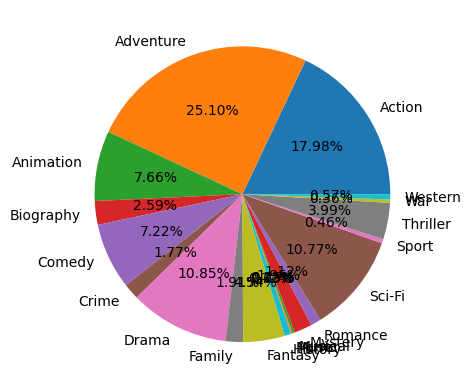

In [22]:
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_sql_query('Select * from IMDB join genre using(Movie_id)',db)
df.Budget.replace("", 0, inplace=True)
df.genre.replace("", np.nan, inplace=True)
df.dropna(subset = ["genre"], inplace=True)
group_sum = df.groupby("genre")["Budget"].sum()
for i in range(len(group_sum)):
    percent = group_sum.values[i]/(sum(group_sum))*100
    print(group_sum.index[i], format(percent, ".2f"))
plt.pie(group_sum, labels=group_sum.index, autopct="%.2f%%")
plt.show()

# IMDB genre earning 

Action 17.91
Adventure 23.57
Animation 6.77
Biography 3.42
Comedy 7.69
Crime 1.55
Drama 11.96
Family 1.05
Fantasy 5.15
History 1.04
Horror 0.01
Music 0.43
Musical 0.38
Mystery 2.01
Romance 1.45
Sci-Fi 9.95
Sport 0.32
Thriller 4.42
War 0.25
Western 0.65


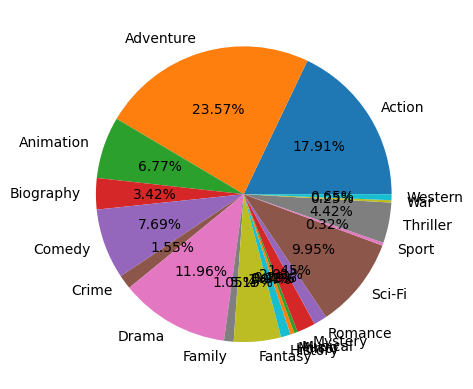

In [23]:
df = pd.read_sql_query('SELECT * from earning join genre using(Movie_id)', db)
df['Total Earning'] = df['Domestic'] + df['Worldwide']
df.genre.replace("", np.nan, inplace=True)
grouped_sum = df.groupby('genre')['Total Earning'].sum()

for i in range(len(grouped_sum)) :
    percent = (grouped_sum.values[i]/(grouped_sum.sum()))*100
    print(grouped_sum.index[i], format(percent, '0.2f'))
plt.pie(grouped_sum, labels=grouped_sum.index, autopct="%0.2f%%")
plt.show()

# IMDB specific genre

In [25]:
df = pd.read_sql_query('SELECT * from IMDB JOIN genre using(Movie_id)', db)
df = df[((df.genre == 'Sci-Fi') &  (df.Rating >= 8)) | ((df.genre == 'Mystrey') & (df.Rating >= 8))]
df.groupby('Rating')['genre'].sum()
print(df.Title.values[0])

Arrival (2016)
